# Possum Age prediction

# imports

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from function import*
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

## data

| sex | hdlngth | skullw | totlngth | taill  | footlgth | age |
| --- | ------- | ------ | -------- | ------ | -------- | --- |
| 1   | 94.10   | 60.40  | 89.00    | 36.00  | 74.50    | 8.00 |
| 0   | 92.50   | 57.60  | 91.50    | 36.50  | 72.50    | 6.00 |
| 0   | 94.00   | 60.00  | 95.50    | 39.00  | 75.40    | 6.00 |
| 0   | 93.20   | 57.10  | 92.00    | 38.00  | 76.10    | 6.00 |
| 0   | 91.50   | 56.30  | 85.50    | 36.00  | 71.00    | 2.00 |
| 0   | 93.10   | 54.80  | 90.50    | 35.50  | 73.20    | 1.00 |


In [6]:
# load the dataset
X_train, y_train = load_data()
X_features = ['sex', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'age']

###### Data Visvalization

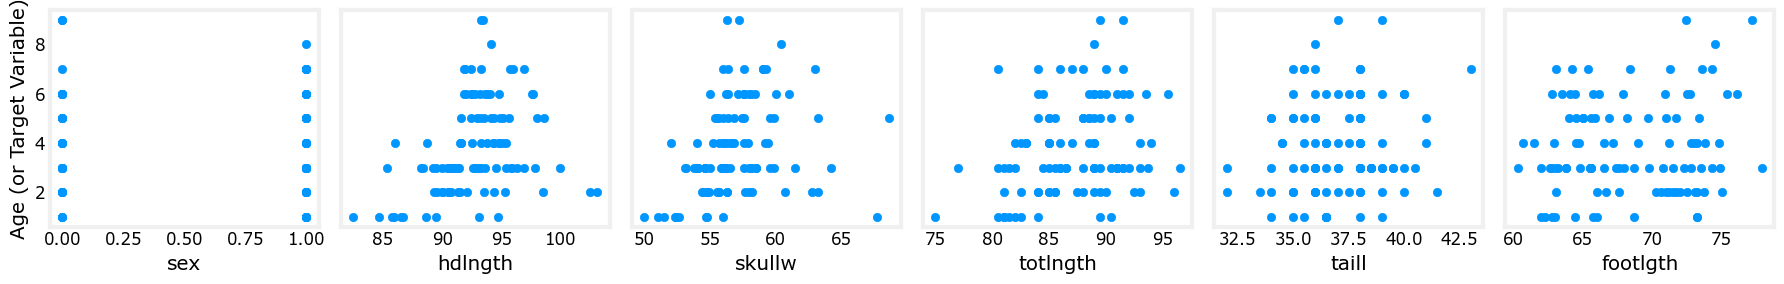

In [12]:
fig, ax = plt.subplots(1, 6, figsize=(18, 3), sharey=True)  # Adjust for 6 features instead of 4
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train)  # Plot each feature vs. the target variable (e.g., age)
    ax[i].set_xlabel(X_features[i])  # Set the x-axis label to the corresponding feature name

ax[0].set_ylabel("Age (or Target Variable)")  # Set y-axis label to match your target variable
plt.tight_layout()
plt.show()

## The Model 

#### SCaling

In [14]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[ 1.  20.6 18.6 21.5 11.  17.6]
Peak to Peak range by column in Normalized X:[2.02894709 5.88361075 6.0247192  5.14849918 5.60682225 4.00765262]


### Random forest
Good for complex relationships with few outliers and when the number of features is small.

#### train the model

In [39]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_norm, y_train)

RandomForestRegressor(random_state=42)

In [40]:
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


##### Prediction

In [41]:
y_pred = model.predict(X_norm)

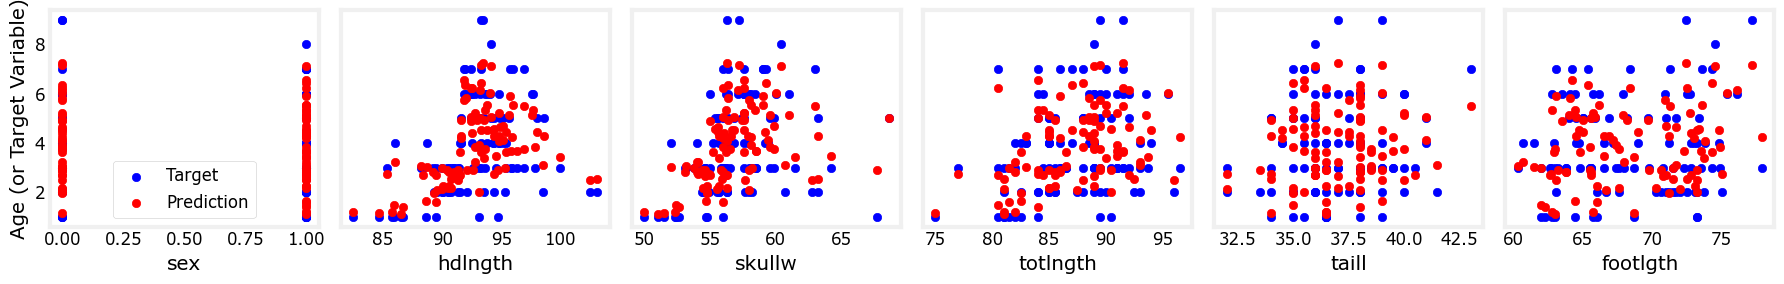

In [44]:
# Create subplots for 6 features (1 row, 6 columns)
fig, ax = plt.subplots(1, 6, figsize=(18, 3), sharey=True)  # Share y-axis across all subplots

# Plot target and predictions for each feature
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='Target', color='blue')  # True target values in blue
    ax[i].scatter(X_train[:, i], y_pred, label='Prediction', color='red')  # Predicted values in red
    ax[i].set_xlabel(X_features[i])  # Set the x-axis label to the corresponding feature name

# Set y-axis label on the first subplot only
ax[0].set_ylabel("Age (or Target Variable)")  # Update to match your target variable

# Add legend to the first subplot
ax[0].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

### Evalvation

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 0.5125742574257426
MSE: 0.4342108910891088
R²: 0.8804355315013767


In [49]:
model.predict(X_norm[4].reshape(1, -1))

array([2.68])